UNIVERSIDAD CATÓLICA BOLIVIANA ”SAN PABLO”
MAESTRÍA EN CIENCIA DE DATOS V4
MATERIA MINERÍA DE DATOS 1
DATASET DE PRACTICA

BIMBO

1.	Quitar filas duplicadas
2.	Quitar columnas duplicadas
3.	Identificar columnas que tienen valores constantes
4.	Identifique el porcentaje de valores faltantes en las columnas
5.	Analice el caso de los atributos siguientes por medio de la obtención de gráficas: Agencia_ID, Town, Product_ID, Cliente_ID, NombreCliente, Semana, Canal_ID, Ruta_SAK, Venta_uni_hoy, Venta_hoy. Cuales decidiría usted de transformar o en su caso quitar, con el propósito de mejorar el dataset. 
6.	Obtenga la matriz de correlación de las variables numéricas e identifique si algunas se pudieran quitar
7.	Discretice Ruta_SAK, Venta_hoy, Dev_uni_próxima y Dev_próxima.
8.	Obtenga la tabla de relación de frecuencias entre los atributos NombreProducto y State.
9.	Aísle los atributos numéricos e identifique outliers. Quite los outliers que tengan rangos muy lejanos.
10.	Genere variables dummy utilizando Hot-encoding. Decida en que atributos aplicar este procedimiento, justificándolo.
11.	En Ruta_SAK el valor 9999 es null, cambie este valor por el que considere se adecua más a este campo (i.e. media, mediana, algún otro)
12.	El atributo State tiene valores faltantes, cambiar estas marcas con el State que sea más común.
13.	Identifique atributos que no serían de utilidad por su nivel de variación. 
14.	Normalice y estandarice los atributos numéricos.
15.	Realice el cálculo con los campos Venta_uni_hoy multiplicado por Venta_hoy, para lo cual cree un campo con el resultado.
16.	Obtenga por campo State y Product_ID, el total en monto agrupado del resultado del campo de la respuesta a la pregunta 15.
17.	Obtenga los nombres de clientes y los nombres de productos de State “BAJA CALIFORNIA NORTE” y Canal_ID “4”.

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
import numpy as np

In [103]:
'''1. Quitar filas duplicadas'''
df = pd.read_csv('1_Bimbo.csv', encoding='latin1')
df = df.astype(str).apply(lambda x: x.str.encode('utf-8', 'ignore').str.decode('utf-8'))
df.head()  

,nro,Agencia_ID,Town,State,Producto_ID,NombreProducto,Cliente_ID,NombreCliente,Semana,Canal_ID,Ruta_SAK,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,4890,1117,2001 AG. ATIZAPAN,nan,40217,Mantecada Vainilla 3p 157g Prom TR 40217,59084,MICHOACANA,3,1,1605,2,17.96,0,0.0,2
1,1777,1310,2260 GONZALEZ GALLO,nan,43069,Pinguinos 2p 80g MTA MLA 43069,1108542,ELIZABETH OCEGUERA RUIZ,3,1,2006,6,44.46,0,0.0,6
2,1114,1629,2365 PUEBLA SUR BIMBO,nan,35453,Chocotorro Fresa 1p 50g SP MTB MLA 35453,178450,MECHE,3,1,2024,4,17.76,0,0.0,4
3,4330,1124,2021 AG. XOCHIMILCO 2,nan,4259,Conchas 3p 180g Prom TR 4259,2282890,LA ESTRELLA,3,1,1630,5,62.95,0,0.0,5
4,1420,1312,2278 ZAPOPAN BIMBO,nan,32302,Chocotorro Fresa 1p 50g MTB MLA 32302,69156,DELFINA JIMENEZ ZAMORA,3,1,2057,3,13.32,0,0.0,3


In [104]:
'''2. Quitar columnas duplicadas'''
df.duplicated().sum()

duplicated_rows = df.duplicated()
if duplicated_rows.any():
    print("Existen filas duplicadas")
else:
    print("No existen filas duplicadas")
    
duplicated_cols = df.columns[df.columns.duplicated(keep=False)]
if len(duplicated_cols) > 0:
    print('Existen columnas duplicadas:', list(duplicated_cols))
else:
    print('No hay columnas duplicadas')

No existen filas duplicadas
No hay columnas duplicadas


In [105]:
for col in df:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
        except ValueError:
            pass
'''3. Identificar columnas que tienen valores constantes'''
df_num = df.select_dtypes(include=['int64','float64'])
df_int64 = df.select_dtypes(include=['int64'])
df_float64 = df.select_dtypes(include=['float64'])
df_obj = df.select_dtypes(include=['object'])
print(df_int64.dtypes, df_float64.dtypes, df_obj.dtypes, sep='\n')

nro                  int64
Agencia_ID           int64
Producto_ID          int64
Cliente_ID           int64
Semana               int64
Canal_ID             int64
Ruta_SAK             int64
Venta_uni_hoy        int64
Dev_uni_proxima      int64
Demanda_uni_equil    int64
dtype: object
Venta_hoy      float64
Dev_proxima    float64
dtype: object
Town              object
State             object
NombreProducto    object
NombreCliente     object
dtype: object


In [106]:
df_num.head(5)

,nro,Agencia_ID,Producto_ID,Cliente_ID,Semana,Canal_ID,Ruta_SAK,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,4890,1117,40217,59084,3,1,1605,2,17.96,0,0.0,2
1,1777,1310,43069,1108542,3,1,2006,6,44.46,0,0.0,6
2,1114,1629,35453,178450,3,1,2024,4,17.76,0,0.0,4
3,4330,1124,4259,2282890,3,1,1630,5,62.95,0,0.0,5
4,1420,1312,32302,69156,3,1,2057,3,13.32,0,0.0,3


In [107]:
'''4. Identifique el porcentaje de valores faltantes en las columnas'''
df.replace('nan', np.nan, inplace=True)
for i in df.columns:
    if df[i].isnull().sum() == 0:
        print('No hay valores nulos en',i)
    else:
        print('Si hay valores nulos en',i,'{:.2f}%'.format(df[i].isnull().sum()/len(df[i])*100),df[i].dtype)

No hay valores nulos en nro
No hay valores nulos en Agencia_ID
No hay valores nulos en Town
Si hay valores nulos en State 0.70% object
No hay valores nulos en Producto_ID
No hay valores nulos en NombreProducto
No hay valores nulos en Cliente_ID
No hay valores nulos en NombreCliente
No hay valores nulos en Semana
No hay valores nulos en Canal_ID
No hay valores nulos en Ruta_SAK
No hay valores nulos en Venta_uni_hoy
No hay valores nulos en Venta_hoy
No hay valores nulos en Dev_uni_proxima
No hay valores nulos en Dev_proxima
No hay valores nulos en Demanda_uni_equil


In [108]:
print("Existen:",df['State'].nunique(),"Valores posibles",'\n',df['State'].unique())
freq = df['State'].value_counts()
most_freq = df['State'].value_counts().idxmax()
print(df['State'].value_counts(),'\n','El mes mas frecuente es:',most_freq,'\n')

Existen: 33 Valores posibles 
 [nan 'AGUASCALIENTES' 'BAJA CALIFORNIA NORTE' 'BAJA CALIFORNIA SUR'
 'CAMPECHE' 'CHIAPAS' 'CHIHUAHUA' 'COAHUILA' 'COLIMA' 'DURANGO'
 'ESTADO DE M\x92_XICO' 'GUANAJUATO' 'GUERRERO' 'HIDALGO' 'JALISCO'
 'MICHOAC\x92\x81N' 'M\x92_XICO, D.F.' 'MORELOS' 'NAYARIT'
 'NUEVO LE\x92\x96N' 'OAXACA' 'PUEBLA' 'QUERETARO' 'Queretaro de Arteaga'
 'QUINTANA ROO' 'SAN LUIS POTOS\x92\x8d' 'SINALOA' 'SONORA' 'TABASCO'
 'TAMAULIPAS' 'TLAXCALA' 'VERACRUZ' 'YUCAT\x92\x81N' 'ZACATECAS']
ESTADO DE M_XICO        721
M_XICO, D.F.            491
JALISCO                  425
PUEBLA                   307
VERACRUZ                 295
GUANAJUATO               256
NUEVO LEN              250
MICHOACN               210
HIDALGO                  168
CHIHUAHUA                143
SONORA                   136
TAMAULIPAS               131
COAHUILA                 131
BAJA CALIFORNIA NORTE    123
OAXACA                   113
GUERRERO                 108
SAN LUIS POTOS         106
TABASCO

In [109]:
print("Existen:",df['Semana'].nunique(),"Valores posibles en Semana.col",'\n',df['Semana'].unique(),'\n')
print("Existen:",df['Canal_ID'].nunique(),"Valores posibles en Canal_ID.col",'\n',df['Canal_ID'].unique(),'\n')
print("Existen:",df['Venta_uni_hoy'].nunique(),"Valores posibles en Venta_uni_hoy.col",'\n',df['Venta_uni_hoy'].unique(),'\n')
print("Existen:",df['Dev_uni_proxima'].nunique(),"Valores posibles en Dev_uni_proxima.col",'\n',df['Dev_uni_proxima'].unique(),'\n')
print("Existen:",df['Dev_proxima'].nunique(),"Valores posibles en Dev_proxima.col",'\n',df['Dev_proxima'].unique(),'\n')
print("Existen:",df['Demanda_uni_equil'].nunique(),"Valores posibles en Demanda_uni_equil.col",'\n',df['Demanda_uni_equil'].unique(),'\n')

Existen: 1 Valores posibles en Semana.col 
 [3] 

Existen: 8 Valores posibles en Canal_ID.col 
 [ 1 11  4  2  5  7  6  8] 

Existen: 88 Valores posibles en Venta_uni_hoy.col 
 [   2    6    4    5    3   45    1    8   10    9   16   17    7   25
   75  160  307   18   20   13   14   11   12   80   28  130   40   38
    0   15   62   70   48   24   42   26   29   27   58   35   22   21
   44  121  115  136   33   31  112   19   60 1324   34   23   89   47
   76   41   30   36   53  252  197   43   39   52  240   32   37   66
   55   49  391  326   65   64   50   72  140  133 1056  228   46  208
   54   57   93  141] 

Existen: 21 Valores posibles en Dev_uni_proxima.col 
 [ 0  1  2 12  7 10 82 18 27  3 16  9  4  8 20  5 15  6 25 40 24] 

Existen: 120 Valores posibles en Dev_proxima.col 
 [  0.     9.09  15.01  15.    22.5   22.02  19.54  17.17   8.38  93.36
  27.88 100.8    8.15   9.6   26.25  75.   759.32 112.5  121.5   59.82
  21.32  14.52   9.99 118.56  44.28   9.     7.5    7.59  12

In [110]:
print("Existen:",df['Town'].nunique(),"Valores posibles en Town.col",'\n',df['Town'].unique(),'\n')
print("Existen:",df['NombreCliente'].nunique(),"Valores posibles en NombreCliente.col",'\n',df['NombreCliente'].unique(),'\n')

Existen: 245 Valores posibles en Town.col 
 ['2001 AG. ATIZAPAN' '2260 GONZALEZ GALLO' '2365 PUEBLA SUR BIMBO'
 '2021 AG. XOCHIMILCO 2' '2278 ZAPOPAN BIMBO' '2361 ORIZABA'
 '2277 ZACATECAS BIMBO' '2502 SALTILLO MARINELA' '2181 ZIHUATANEJO'
 '2251 AGUASCALIENTES NORTE' '2290 DURANGO BIMBO' '2375 VERACRUZ NORTE'
 '2485 CHIHUAHUA MARINELA' '2300 LEON MILENIUM' '2390 INDUSTRIAL'
 '2161 IRAPUATO GUADALUPE' '2254 AUTLAN_BM'
 '2315 SAN LUIS POTOSI MARINELA' '2031 AG. PANTITLAN'
 '2271 RIO VERDE BIMBO' '2368 TAMPICO BIMBO' '2355 JALAPA I'
 '2515 CAVAZOS' '2379 ARRIAGA_BM' '2465 LAREDO' '2293 GRANJAS MARINELA'
 '2294 GUADALAJARA' '2018 AG. TEPALCATES 2' '2505 TORREON' '2558 GUAYMAS'
 '2367 SAN MARTIN T.' '2252 AGUASCALIENTES SIGLO XXI'
 '2562 MEXICALI PLAZA' '2572 TIJUANA EL FLORIDO' '2563 MEXICALI PONIENTE'
 '2573 TIJUANA GATO BRONCO' '2575 TIJUANA ROSARITO'
 '2574 TIJUANA PACIFICO' '2571 TECATE' '2555 ENSENADA II'
 '2569 SAN QUINT\x92\x8dN' '2313 SAN JOSE DEL CABO' '2297 LA PAZ'
 '2314 SAN LU

5.	Analice el caso de los atributos siguientes por medio de la obtención de gráficas: Agencia_ID, Town, Product_ID, Cliente_ID, NombreCliente, Semana, Canal_ID, Ruta_SAK, Venta_uni_hoy, Venta_hoy. Cuales decidiría usted de transformar o en su caso quitar, con el propósito de mejorar el dataset. 

In [111]:
#Se codifica las columnas de tipo object a tipo int64
df_improved = df[['Agencia_ID', 'Town','Producto_ID','Cliente_ID','NombreCliente','Semana','Canal_ID','Ruta_SAK','Venta_uni_hoy','Venta_hoy']]
print(df_improved.dtypes,'\n')

Agencia_ID         int64
Town              object
Producto_ID        int64
Cliente_ID         int64
NombreCliente     object
Semana             int64
Canal_ID           int64
Ruta_SAK           int64
Venta_uni_hoy      int64
Venta_hoy        float64
dtype: object 



In [112]:
from sklearn.preprocessing import LabelEncoder
le_Town = LabelEncoder()
df_improved["Town"] = le_Town.fit_transform(df_improved["Town"])
le_NombreCliente = LabelEncoder()
df_improved["NombreCliente"] = le_NombreCliente.fit_transform(df_improved["NombreCliente"])
df_improved.head(5)

C:\Users\dell_\AppData\Local\Temp\ipykernel_13900\1969409994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_improved["Town"] = le_Town.fit_transform(df_improved["Town"])
C:\Users\dell_\AppData\Local\Temp\ipykernel_13900\1969409994.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_improved["NombreCliente"] = le_NombreCliente.fit_transform(df_improved["NombreCliente"])


,Agencia_ID,Town,Producto_ID,Cliente_ID,NombreCliente,Semana,Canal_ID,Ruta_SAK,Venta_uni_hoy,Venta_hoy
0,1117,0,40217,59084,2250,3,1,1605,2,17.96
1,1310,89,43069,1108542,1077,3,1,2006,6,44.46
2,1629,139,35453,178450,2200,3,1,2024,4,17.76
3,1124,15,4259,2282890,1688,3,1,1630,5,62.95
4,1312,104,32302,69156,817,3,1,2057,3,13.32


In [113]:
print("Existen:",df_improved['Town'].nunique(),"Valores posibles en Town.col",'\n',df_improved['Town'].unique(),'\n')
print("Existen:",df_improved['NombreCliente'].nunique(),"Valores posibles en NombreCliente.col",'\n',df_improved['NombreCliente'].unique(),'\n')

Existen: 245 Valores posibles en Town.col 
 [  0  89 139  15 104 135 103 212  73  80 108 148 206 113 161  58  83 122
  18  97 142 131 215 152 191 109 110  13 214 225 141  81 228 238 229 239
 241 240 237 222 235 120 112 121 242 153 156 175 169 170 172 176 190 197
 187 208 184 185 186 196 195 200 201 198 183  92 125  87 119 188  24  46
  51   3  14  36   8   2  70   9  23  12  69  26   6  39  47  45  37  68
  40  41  52  53  79  71  62  76 111  67 114  56  48  57  78  20  49 181
 136  43 145 133 127 177 100 118  75  99  95  96  84  82  91  94 115  85
  60  74  72  63 124  64  61  77  50  10  38   7  19  44   4  35  16   1
  27  11  17   5  28  22  42 243  55  54  25  59 101 105  90 126 193 203
 216 205 202 207 217 189 210 192 209 129  65 134 162 147  29 180 168  66
 143 178 179  34  30 174  31 138 182  32  33 159 154 166 158  86 102  98
  93 107 106 223 117 227 116 224 231 219 221 232 234 226 218 220 236 233
 230 155 167 160 211 204 194 244 213 199  21 149 132 150 128 137 130 165
 144 14

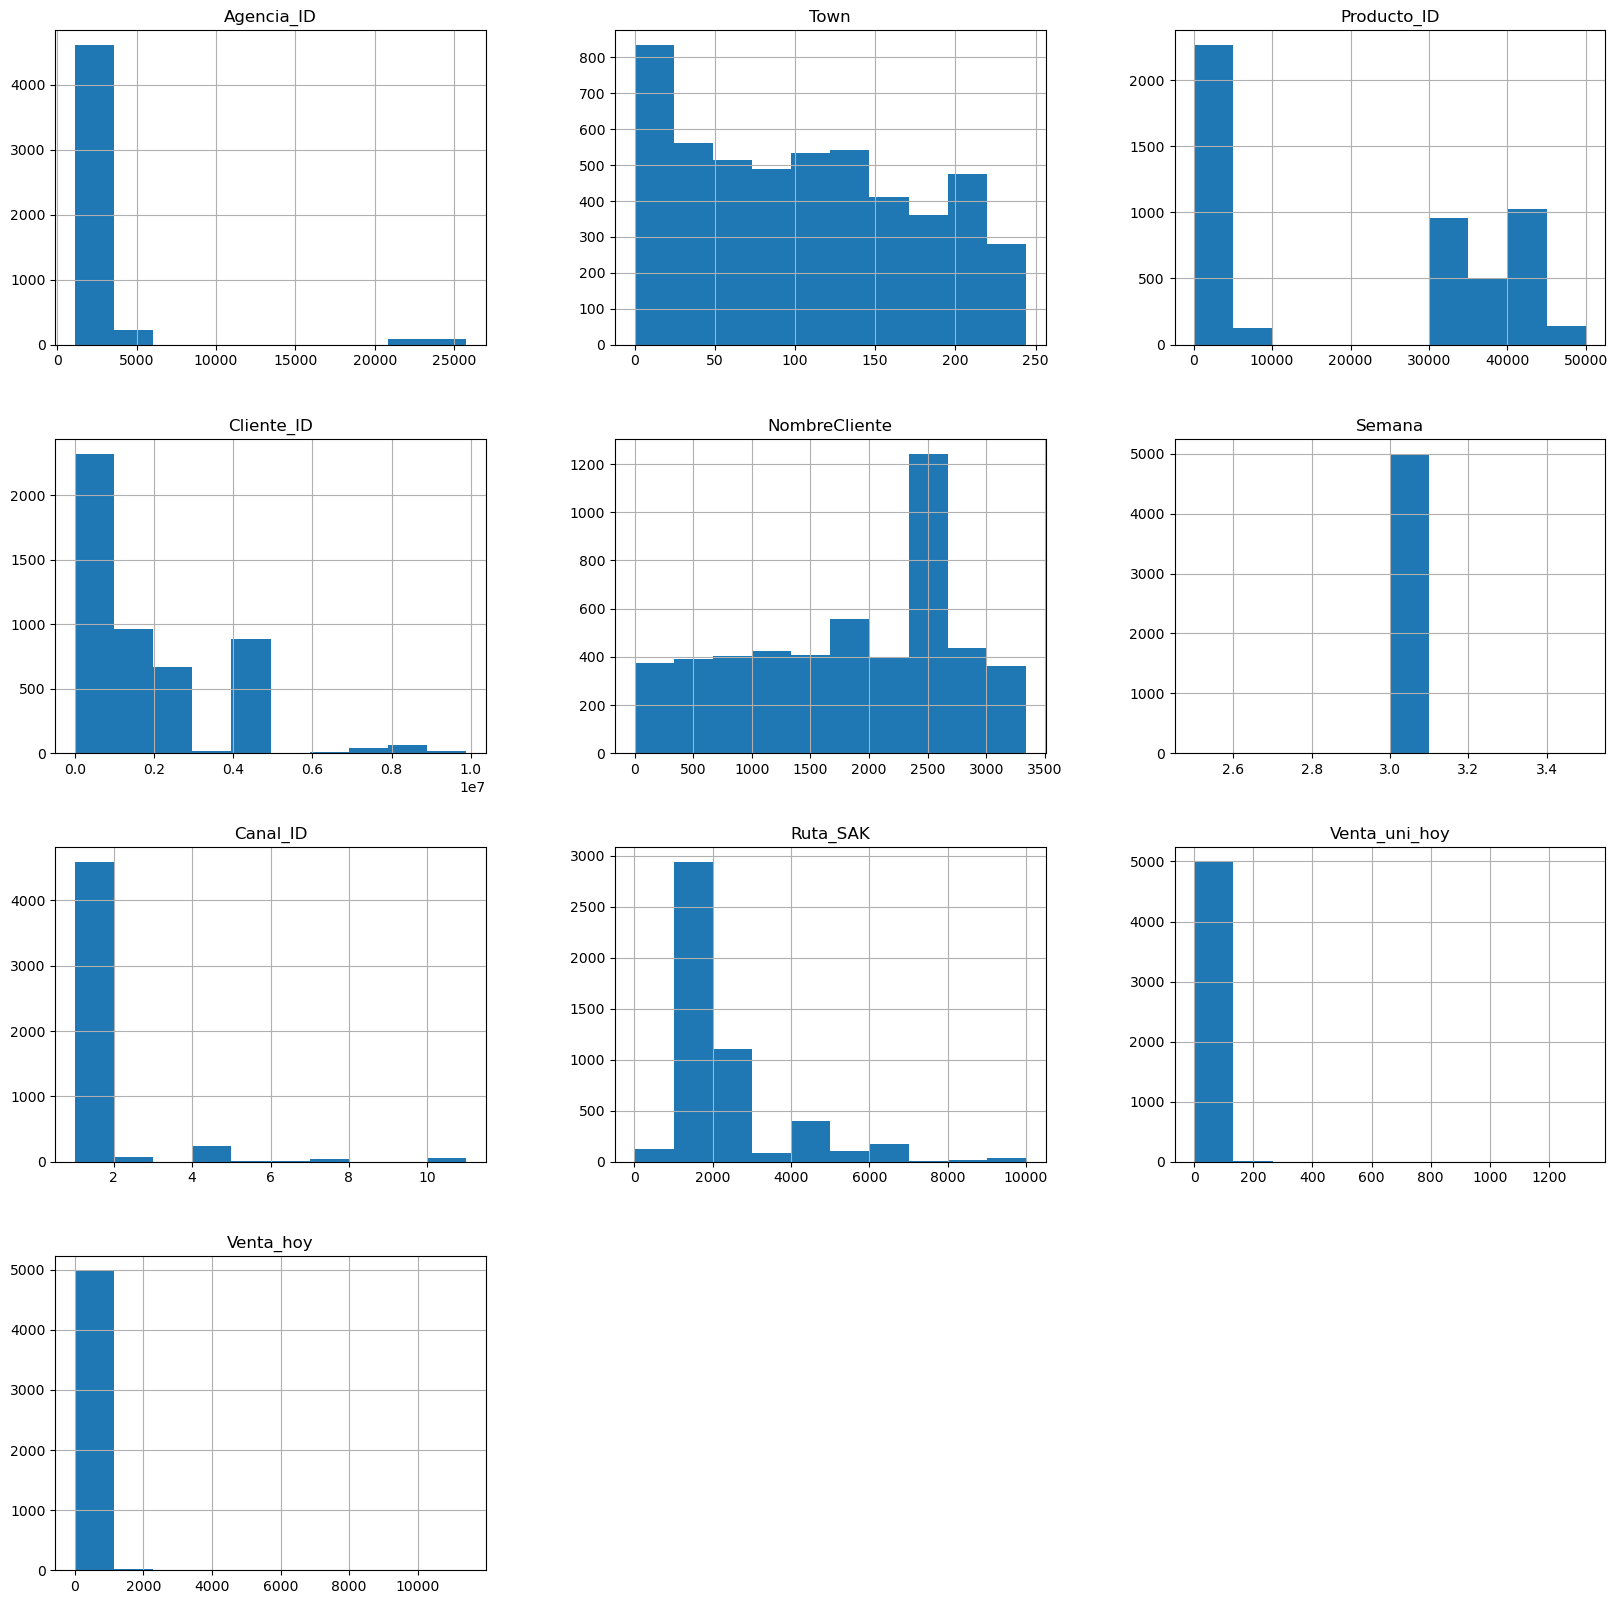

In [114]:
hist = df_improved.hist(figsize=(20,20))

In [115]:
df_improved.columns

Index(['Agencia_ID', 'Town', 'Producto_ID', 'Cliente_ID', 'NombreCliente',
       'Semana', 'Canal_ID', 'Ruta_SAK', 'Venta_uni_hoy', 'Venta_hoy'],
      dtype='object')

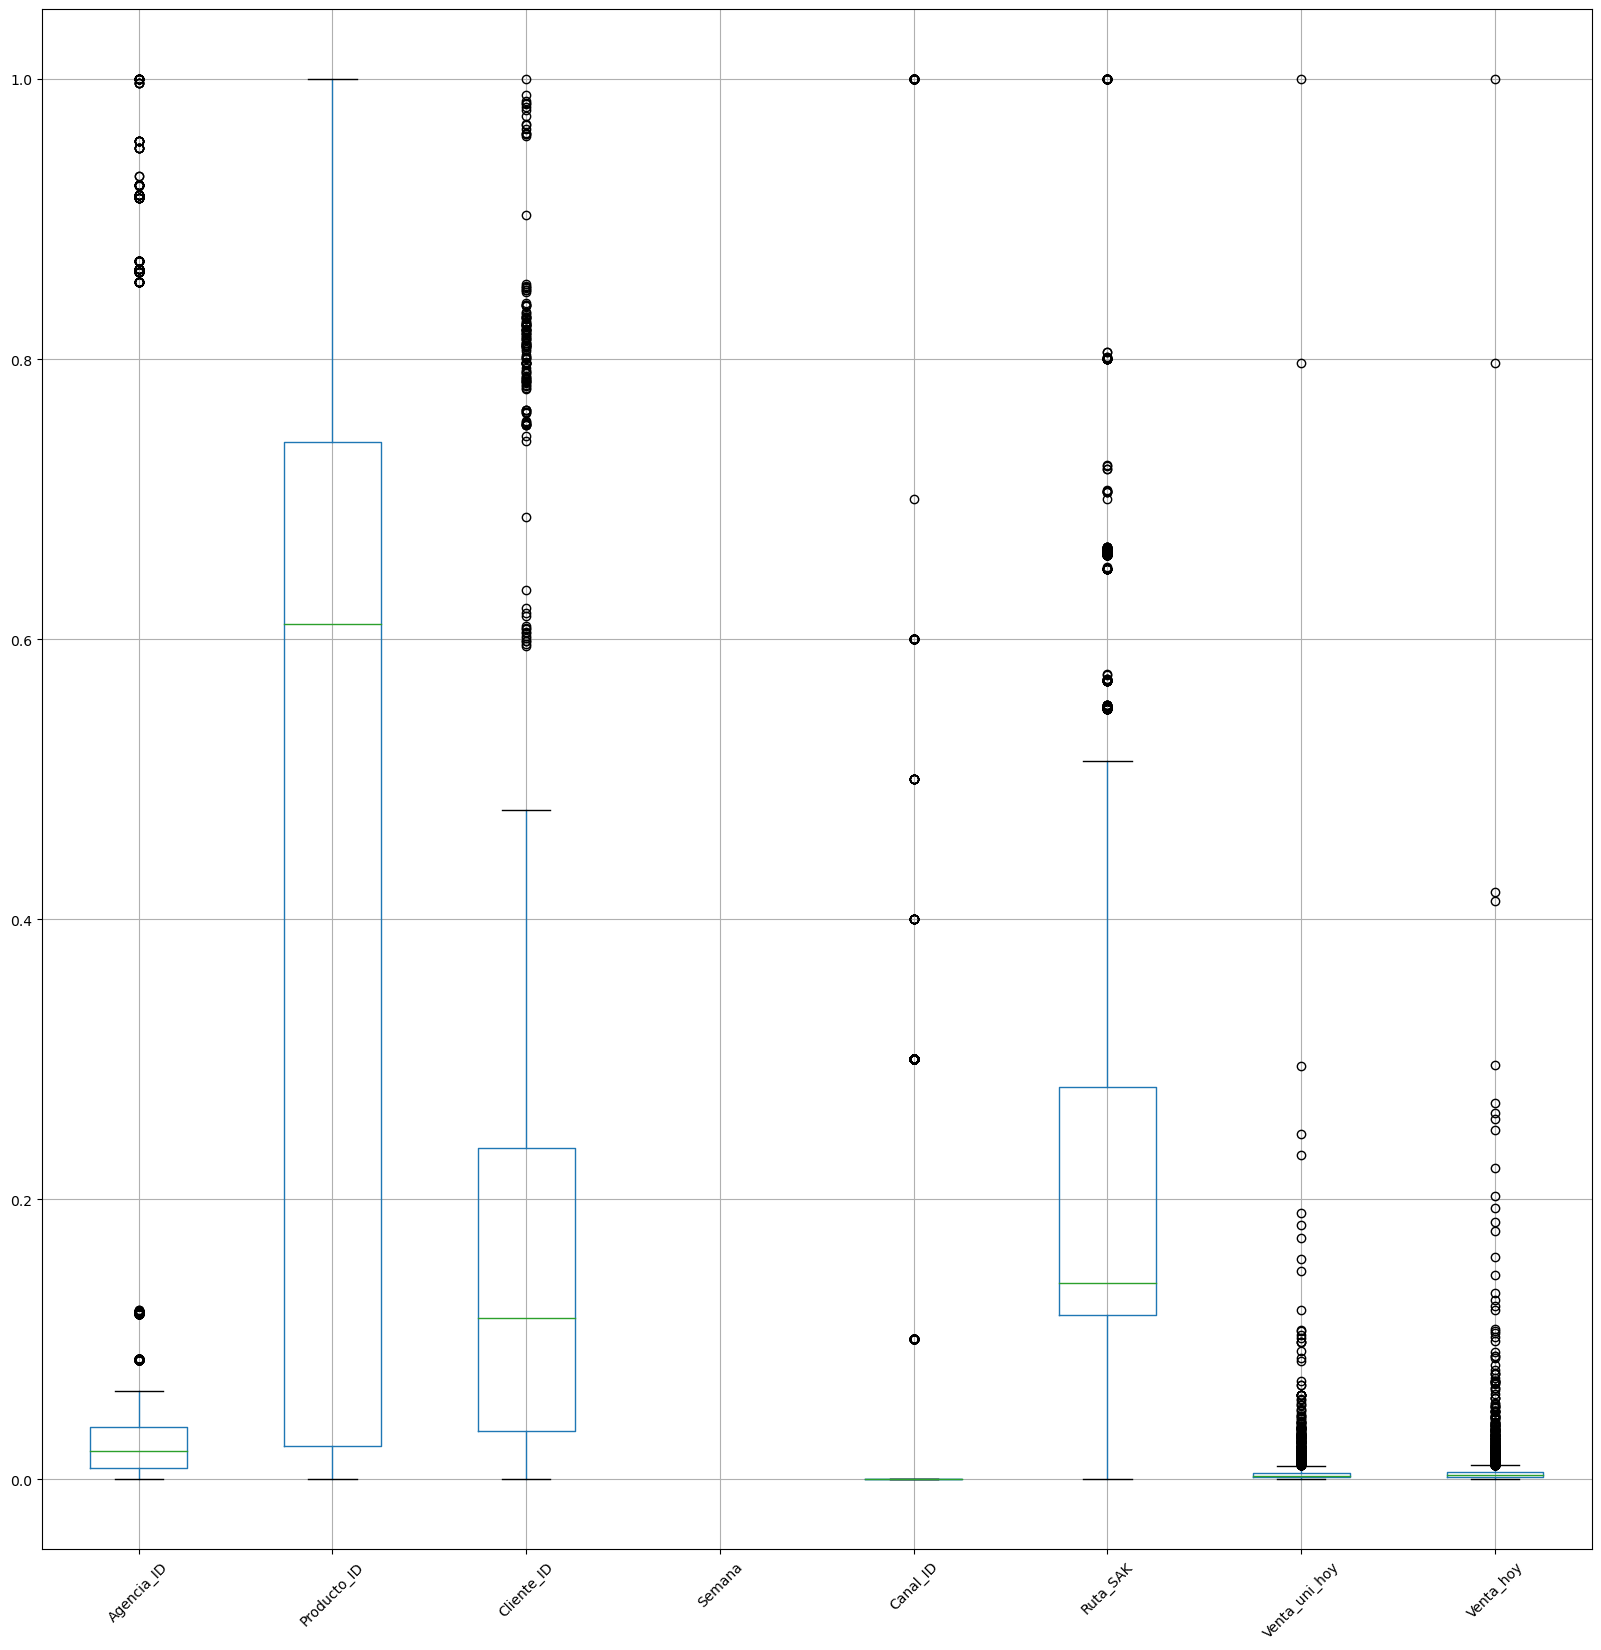

In [116]:
df_select = df_improved.iloc[:,[0,2,3,5,6,7,8,9]]
df_select = df_select.select_dtypes(include=['int64','float64'])
df_norm = (df_select - df_select.min()) / (df_select.max() - df_select.min())
boxplot_1 = df_norm
boxplot = boxplot_1.boxplot(figsize=(20,20), rot=45)

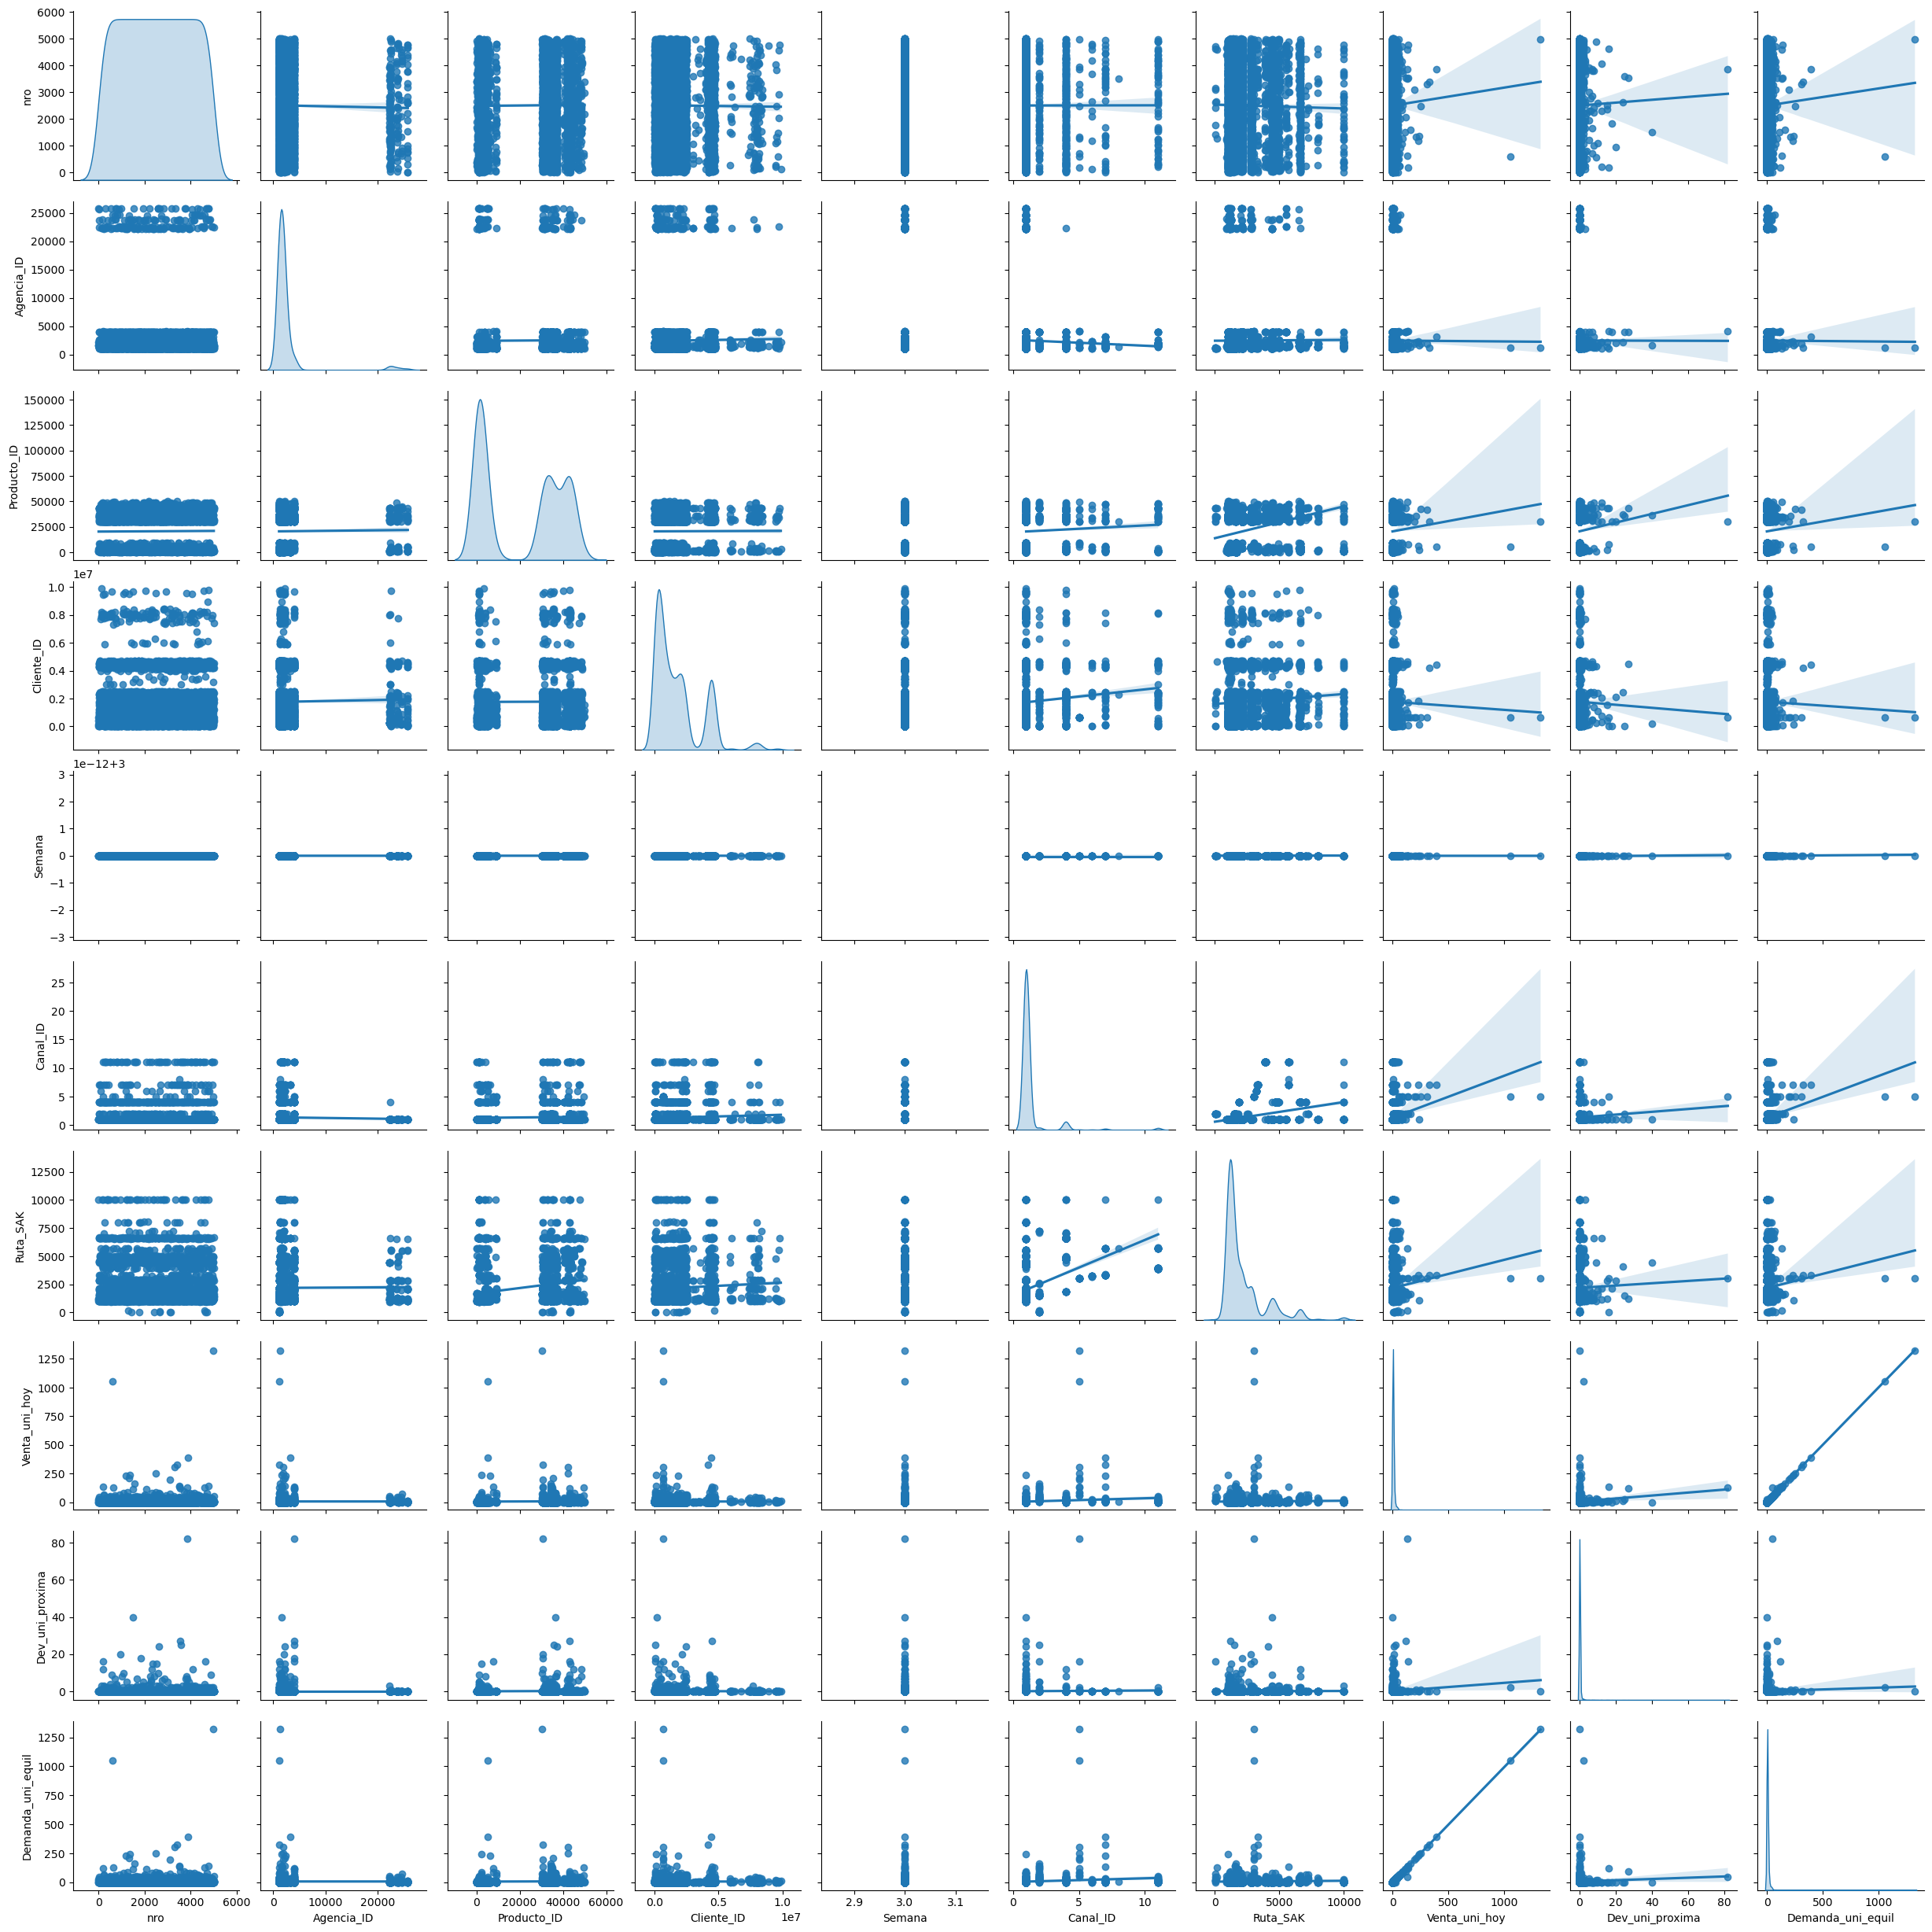

In [117]:
scatter = sb.pairplot(df_int64, kind='reg', diag_kind='kde', height=2.5)

In [118]:
'''6.	Obtenga la matriz de correlación de las variables numéricas e identifique si algunas se pudieran quitar'''
corr_matrix = df_num.corr()
print(corr_matrix)

                        nro  Agencia_ID  Producto_ID  Cliente_ID  Semana  \
nro                1.000000   -0.011266     0.010200   -0.007373     NaN   
Agencia_ID        -0.011266    1.000000     0.011713    0.015731     NaN   
Producto_ID        0.010200    0.011713     1.000000    0.004610     NaN   
Cliente_ID        -0.007373    0.015731     0.004610    1.000000     NaN   
Semana                  NaN         NaN          NaN         NaN     NaN   
Canal_ID           0.000619   -0.035900     0.048599    0.076317     NaN   
Ruta_SAK          -0.015959    0.005857     0.275678    0.063137     NaN   
Venta_uni_hoy      0.013162   -0.001135     0.031088   -0.009037     NaN   
Venta_hoy          0.006170   -0.005182     0.019605   -0.008707     NaN   
Dev_uni_proxima    0.006167   -0.000293     0.038582   -0.009897     NaN   
Dev_proxima        0.012014    0.001211     0.026951   -0.011368     NaN   
Demanda_uni_equil  0.012511   -0.001211     0.029788   -0.008711     NaN   

           

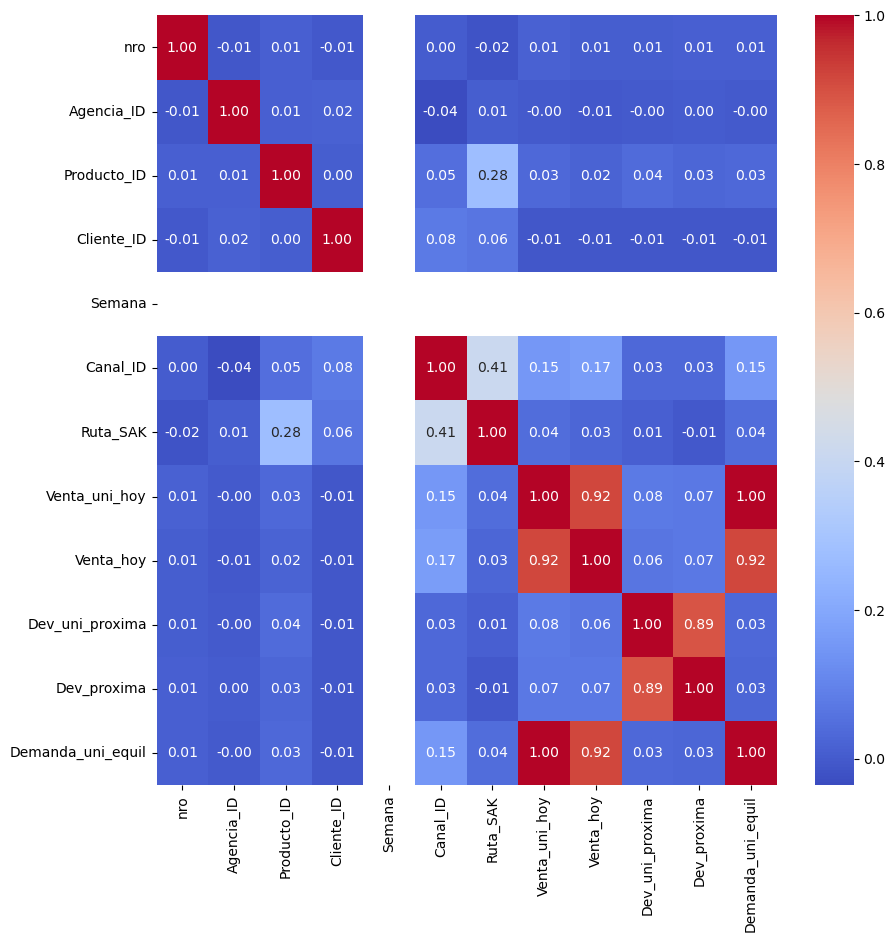

In [119]:
plt.figure(figsize=(10, 10))
sb.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

### La columna que se demostro no tiene impacto en el estudio es Semana, ya que solo contiene un valor de 3 que es constante durante todo el Data Set, otra variable a considerar es Canal_ID y arreglar los outliers en Venta_Uni_Hoy y Venta_Hoy

In [120]:
'''7.	Discretice Ruta_SAK, Venta_hoy, Dev_uni_próxima y Dev_próxima.'''

print("valores antes de la normalizacion:",df['Ruta_SAK'].describe().loc[['min','max']],sep='\n')
print("valores antes de la normalizacion:",df['Venta_hoy'].describe().loc[['min','max']],sep='\n')
print("valores antes de la normalizacion:",df['Dev_uni_proxima'].describe().loc[['min','max']],sep='\n')
print("valores antes de la normalizacion:",df['Dev_proxima'].describe().loc[['min','max']],'\n',sep='\n')
df_disc = df[['Ruta_SAK','Venta_hoy','Dev_uni_proxima','Dev_proxima']]
df_disc_norm = (df_disc - df_disc.min()) / (df_disc.max() - df_disc.min())
print("valores despues de la normalizacion:",df_disc_norm['Ruta_SAK'].describe().loc[['min','max']],sep='\n')
print("valores despues de la normalizacion:",df_disc_norm['Venta_hoy'].describe().loc[['min','max']],sep='\n')
print("valores despues de la normalizacion:",df_disc_norm['Dev_uni_proxima'].describe().loc[['min','max']],sep='\n')
print("valores despues de la normalizacion:",df_disc_norm['Dev_proxima'].describe().loc[['min','max']],sep='\n')
'''arr = np.empty(4, dtype=np.float64)
max_Ruta_SAK = df_disc_norm['Ruta_SAK'].max()
max_Venta_hoy = df_disc_norm['Venta_hoy'].max()
max_Dev_uni_proxima = df_disc_norm['Dev_uni_proxima'].max()
max_Dev_proxima = df_disc_norm['Dev_proxima'].max()
arr[0]=(max_Ruta_SAK)
arr[1]=(max_Venta_hoy)
arr[2]=(max_Dev_uni_proxima)
arr[3]=(max_Dev_proxima)
count=0'''
df_disc_norm.head(5)

valores antes de la normalizacion:
min       8.0
max    9999.0
Name: Ruta_SAK, dtype: float64
valores antes de la normalizacion:
min        0.00
max    11412.88
Name: Venta_hoy, dtype: float64
valores antes de la normalizacion:
min     0.0
max    82.0
Name: Dev_uni_proxima, dtype: float64
valores antes de la normalizacion:
min      0.00
max    759.32
Name: Dev_proxima, dtype: float64


valores despues de la normalizacion:
min    0.0
max    1.0
Name: Ruta_SAK, dtype: float64
valores despues de la normalizacion:
min    0.0
max    1.0
Name: Venta_hoy, dtype: float64
valores despues de la normalizacion:
min    0.0
max    1.0
Name: Dev_uni_proxima, dtype: float64
valores despues de la normalizacion:
min    0.0
max    1.0
Name: Dev_proxima, dtype: float64


,Ruta_SAK,Venta_hoy,Dev_uni_proxima,Dev_proxima
0,0.159844,0.001574,0.0,0.0
1,0.199980,0.003896,0.0,0.0
2,0.201782,0.001556,0.0,0.0
3,0.162346,0.005516,0.0,0.0
4,0.205085,0.001167,0.0,0.0


In [121]:
for i in df_disc_norm.columns:
    df_disc_norm[i] = (pd.cut(df_disc_norm[i], bins=10, labels=False, include_lowest=True))/10
print(df_disc_norm.head(5))

   Ruta_SAK  Venta_hoy  Dev_uni_proxima  Dev_proxima
0       0.1        0.0              0.0          0.0
1       0.1        0.0              0.0          0.0
2       0.2        0.0              0.0          0.0
3       0.1        0.0              0.0          0.0
4       0.2        0.0              0.0          0.0


In [122]:
print(df_disc_norm['Ruta_SAK'].value_counts(),'Cantidad de elementos:',len(df_disc_norm['Ruta_SAK']))
print(df_disc_norm['Venta_hoy'].value_counts(),'Cantidad de elementos:',len(df_disc_norm['Venta_hoy']))
print(df_disc_norm['Dev_uni_proxima'].value_counts(),'Cantidad de elementos:',len(df_disc_norm['Dev_uni_proxima']))
print(df_disc_norm['Dev_proxima'].value_counts(),'Cantidad de elementos:',len(df_disc_norm['Dev_proxima']))

0.1    2935
0.2    1110
0.4     404
0.6     174
0.0     122
0.5     101
0.3      88
0.9      40
0.8      16
0.7      10
Name: Ruta_SAK, dtype: int64 Cantidad de elementos: 5000
0.0    4976
0.1      13
0.2       7
0.4       2
0.9       1
0.7       1
Name: Venta_hoy, dtype: int64 Cantidad de elementos: 5000
0.0    4982
0.1      11
0.2       3
0.3       2
0.9       1
0.4       1
Name: Dev_uni_proxima, dtype: int64 Cantidad de elementos: 5000
0.0    4983
0.1      12
0.2       2
0.9       1
0.5       1
0.3       1
Name: Dev_proxima, dtype: int64 Cantidad de elementos: 5000


In [123]:
'''8.	Obtenga la tabla de relación de frecuencias entre los atributos NombreProducto y State.'''
df.head(5)

,nro,Agencia_ID,Town,State,Producto_ID,NombreProducto,Cliente_ID,NombreCliente,Semana,Canal_ID,Ruta_SAK,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,4890,1117,2001 AG. ATIZAPAN,NaN,40217,Mantecada Vainilla 3p 157g Prom TR 40217,59084,MICHOACANA,3,1,1605,2,17.96,0,0.0,2
1,1777,1310,2260 GONZALEZ GALLO,NaN,43069,Pinguinos 2p 80g MTA MLA 43069,1108542,ELIZABETH OCEGUERA RUIZ,3,1,2006,6,44.46,0,0.0,6
2,1114,1629,2365 PUEBLA SUR BIMBO,NaN,35453,Chocotorro Fresa 1p 50g SP MTB MLA 35453,178450,MECHE,3,1,2024,4,17.76,0,0.0,4
3,4330,1124,2021 AG. XOCHIMILCO 2,NaN,4259,Conchas 3p 180g Prom TR 4259,2282890,LA ESTRELLA,3,1,1630,5,62.95,0,0.0,5
4,1420,1312,2278 ZAPOPAN BIMBO,NaN,32302,Chocotorro Fresa 1p 50g MTB MLA 32302,69156,DELFINA JIMENEZ ZAMORA,3,1,2057,3,13.32,0,0.0,3


c:\Users\dell_\anaconda3\envs\venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.draw()
c:\Users\dell_\anaconda3\envs\venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.draw()
c:\Users\dell_\anaconda3\envs\venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.draw()
c:\Users\dell_\anaconda3\envs\venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.draw()
c:\Users\dell_\anaconda3\envs\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dell_\anaconda3\envs\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dell_\anaconda3\env

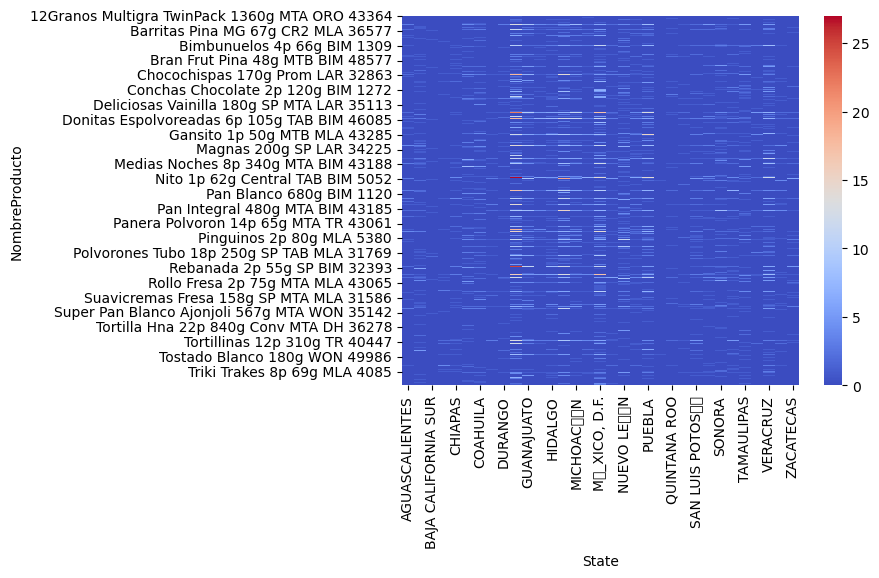

In [124]:
tabla_frecuencias = pd.crosstab(df['NombreProducto'], df['State'])
#print(tabla_frecuencias)
sns.heatmap(tabla_frecuencias, cmap='coolwarm')
plt.show()

c:\Users\dell_\anaconda3\envs\venv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


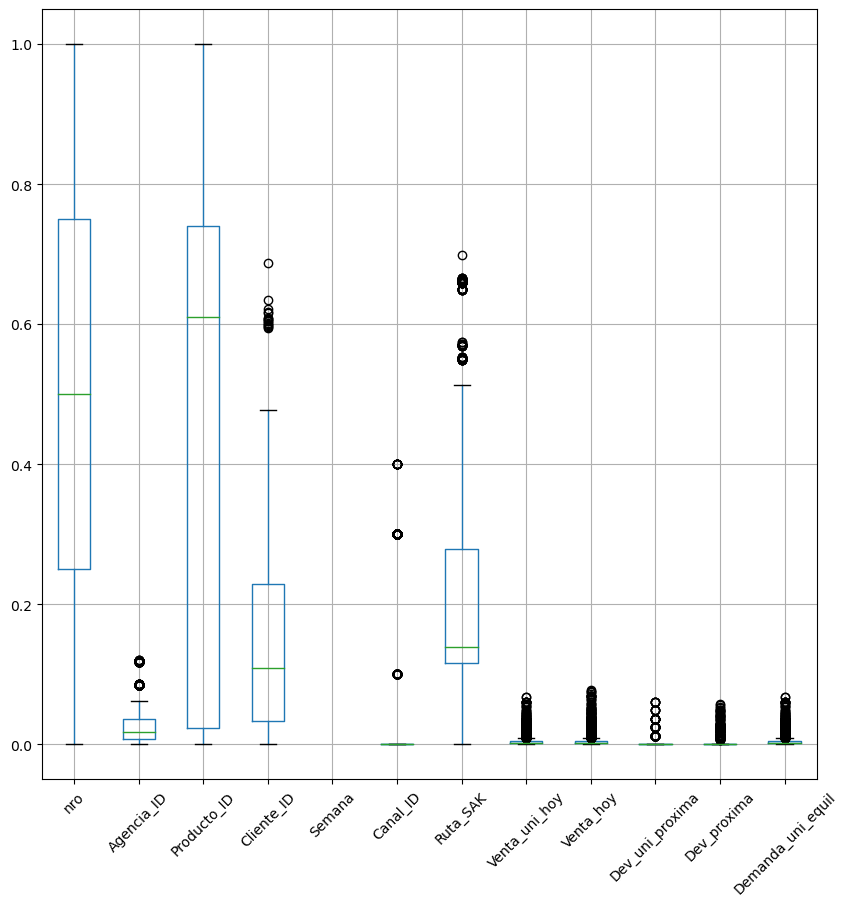

In [145]:
'''9.	Aísle los atributos numéricos e identifique outliers. Quite los outliers que tengan rangos muy lejanos.'''
df_num = df.select_dtypes(include=['int64','float64'])
norm_df_num = (df_num - df_num.min()) / (df_num.max() - df_num.min())
mean_num = np.mean(norm_df_num)
std_num = np.std(norm_df_num)
lower_limit = mean_num - 3 * std_num
upper_limit = mean_num + 3 * std_num
data_filtered_2 = norm_df_num[(norm_df_num >= lower_limit) & (norm_df_num <= upper_limit)]
boxplot_2 = data_filtered_2.boxplot(figsize=(10,10), rot=45)

10.	Genere variables dummy utilizando Hot-encoding. Decida en que atributos aplicar este procedimiento, justificándolo

Las variables ya fueron codificadas con la tecnica de LabelEncoder, por lo que no es necesario volver a codificarlas. LabelEncoder es una técnica de codificación utilizada para transformar variables categóricas en variables numéricas. Esta técnica asigna un valor numérico a cada categoría única de la variable categórica

Entre los atributos codificados tenemos a:

1. Town
2. NombreCliente
3. NombreProducto
4. State


In [147]:
df_le = df[['Town','NombreCliente','NombreProducto','State']]

In [148]:
le_Town = LabelEncoder()
df_le["Town"] = le_Town.fit_transform(df["Town"])
le_NombreCliente = LabelEncoder()
df_le["NombreCliente"] = le_NombreCliente.fit_transform(df["NombreCliente"])
le_NombreProducto = LabelEncoder()
df_le["NombreProducto"] = le_NombreProducto.fit_transform(df["NombreProducto"])
le_State = LabelEncoder()
df_le["State"] = le_State.fit_transform(df["State"])
df_le.head(5)

C:\Users\dell_\AppData\Local\Temp\ipykernel_13900\3071139508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_le["Town"] = le_Town.fit_transform(df["Town"])
C:\Users\dell_\AppData\Local\Temp\ipykernel_13900\3071139508.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_le["NombreCliente"] = le_NombreCliente.fit_transform(df["NombreCliente"])
C:\Users\dell_\AppData\Local\Temp\ipykernel_13900\3071139508.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,Town,NombreCliente,NombreProducto,State
0,0,2250,156,33
1,89,1077,257,33
2,139,2200,76,33
3,15,1688,84,33
4,104,817,74,33


In [150]:
'''11.	En Ruta_SAK el valor 9999 es null, cambie este valor por el que considere se adecua más a este campo (i.e. media, mediana, algún otro)'''
mediana = df['Ruta_SAK'].mode()[0]
df['Ruta_SAK'] = df['Ruta_SAK'].replace(9999, mediana)

#Ruta_SAK es una variable categorica, por lo tanto se reemplazara por la moda


1028

In [151]:
'''12.	El atributo State tiene valores faltantes, cambiar estas marcas con el State que sea más común.'''

print("Existen:",df['State'].nunique(),"Valores posibles",'\n',df['State'].unique())
freq = df['State'].value_counts()
most_freq = df['State'].value_counts().idxmax()
print(df['State'].value_counts(),'\n','El mes mas frecuente es:',most_freq,'\n')

Existen: 33 Valores posibles 
 [nan 'AGUASCALIENTES' 'BAJA CALIFORNIA NORTE' 'BAJA CALIFORNIA SUR'
 'CAMPECHE' 'CHIAPAS' 'CHIHUAHUA' 'COAHUILA' 'COLIMA' 'DURANGO'
 'ESTADO DE M\x92_XICO' 'GUANAJUATO' 'GUERRERO' 'HIDALGO' 'JALISCO'
 'MICHOAC\x92\x81N' 'M\x92_XICO, D.F.' 'MORELOS' 'NAYARIT'
 'NUEVO LE\x92\x96N' 'OAXACA' 'PUEBLA' 'QUERETARO' 'Queretaro de Arteaga'
 'QUINTANA ROO' 'SAN LUIS POTOS\x92\x8d' 'SINALOA' 'SONORA' 'TABASCO'
 'TAMAULIPAS' 'TLAXCALA' 'VERACRUZ' 'YUCAT\x92\x81N' 'ZACATECAS']
ESTADO DE M_XICO        721
M_XICO, D.F.            491
JALISCO                  425
PUEBLA                   307
VERACRUZ                 295
GUANAJUATO               256
NUEVO LEN              250
MICHOACN               210
HIDALGO                  168
CHIHUAHUA                143
SONORA                   136
TAMAULIPAS               131
COAHUILA                 131
BAJA CALIFORNIA NORTE    123
OAXACA                   113
GUERRERO                 108
SAN LUIS POTOS         106
TABASCO

In [152]:
'''13.	Identifique atributos que no serían de utilidad por su nivel de variación. '''
std_num = np.std(df)
std_num

c:\Users\dell_\anaconda3\envs\venv\lib\site-packages\numpy\core\fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


nro                  1.443376e+03
Agencia_ID           3.991571e+03
Producto_ID          1.841086e+04
Cliente_ID           1.823868e+06
Semana               0.000000e+00
Canal_ID             1.354144e+00
Ruta_SAK             1.620522e+03
Venta_uni_hoy        2.814790e+01
Venta_hoy            2.752412e+02
Dev_uni_proxima      1.660043e+00
Dev_proxima          1.487981e+01
Demanda_uni_equil    2.804937e+01
dtype: float64

In [130]:
'''14.	Normalice y estandarice los atributos numéricos.'''
df_num = df.select_dtypes(include=['int64','float64'])
norm_df_num = (df_num - df_num.min()) / (df_num.max() - df_num.min())

'14.\tNormalice y estandarice los atributos numéricos.'

In [153]:
'''15.	Realice el cálculo con los campos Venta_uni_hoy multiplicado por Venta_hoy, para lo cual cree un campo con el resultado.'''
df['Venta_total'] = df['Venta_uni_hoy'] * df['Venta_hoy']
df.head(5)

,nro,Agencia_ID,Town,State,Producto_ID,NombreProducto,Cliente_ID,NombreCliente,Semana,Canal_ID,Ruta_SAK,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,Venta_total
0,4890,1117,2001 AG. ATIZAPAN,NaN,40217,Mantecada Vainilla 3p 157g Prom TR 40217,59084,MICHOACANA,3,1,1605,2,17.96,0,0.0,2,35.92
1,1777,1310,2260 GONZALEZ GALLO,NaN,43069,Pinguinos 2p 80g MTA MLA 43069,1108542,ELIZABETH OCEGUERA RUIZ,3,1,2006,6,44.46,0,0.0,6,266.76
2,1114,1629,2365 PUEBLA SUR BIMBO,NaN,35453,Chocotorro Fresa 1p 50g SP MTB MLA 35453,178450,MECHE,3,1,2024,4,17.76,0,0.0,4,71.04
3,4330,1124,2021 AG. XOCHIMILCO 2,NaN,4259,Conchas 3p 180g Prom TR 4259,2282890,LA ESTRELLA,3,1,1630,5,62.95,0,0.0,5,314.75
4,1420,1312,2278 ZAPOPAN BIMBO,NaN,32302,Chocotorro Fresa 1p 50g MTB MLA 32302,69156,DELFINA JIMENEZ ZAMORA,3,1,2057,3,13.32,0,0.0,3,39.96


In [155]:
'''16.	Obtenga por campo State y Product_ID, el total en monto agrupado del resultado del campo de la respuesta a la pregunta 15.'''
df.groupby(['State', 'Producto_ID'])['Venta_total'].sum()
df.head(5)

,nro,Agencia_ID,Town,State,Producto_ID,NombreProducto,Cliente_ID,NombreCliente,Semana,Canal_ID,Ruta_SAK,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,Venta_total
0,4890,1117,2001 AG. ATIZAPAN,NaN,40217,Mantecada Vainilla 3p 157g Prom TR 40217,59084,MICHOACANA,3,1,1605,2,17.96,0,0.0,2,35.92
1,1777,1310,2260 GONZALEZ GALLO,NaN,43069,Pinguinos 2p 80g MTA MLA 43069,1108542,ELIZABETH OCEGUERA RUIZ,3,1,2006,6,44.46,0,0.0,6,266.76
2,1114,1629,2365 PUEBLA SUR BIMBO,NaN,35453,Chocotorro Fresa 1p 50g SP MTB MLA 35453,178450,MECHE,3,1,2024,4,17.76,0,0.0,4,71.04
3,4330,1124,2021 AG. XOCHIMILCO 2,NaN,4259,Conchas 3p 180g Prom TR 4259,2282890,LA ESTRELLA,3,1,1630,5,62.95,0,0.0,5,314.75
4,1420,1312,2278 ZAPOPAN BIMBO,NaN,32302,Chocotorro Fresa 1p 50g MTB MLA 32302,69156,DELFINA JIMENEZ ZAMORA,3,1,2057,3,13.32,0,0.0,3,39.96


In [156]:
'''17.	Obtenga los nombres de clientes y los nombres de productos de State “BAJA CALIFORNIA NORTE” y Canal_ID “4”.'''
filtro = (df["State"] == "BAJA CALIFORNIA NORTE") & (df["Canal_ID"] == 4)
datos_filtrados = df.loc[filtro, :]

# Seleccionar las columnas deseadas
clientes_productos = datos_filtrados[["NombreCliente", "NombreProducto"]]

# Imprimir los resultados
print(clientes_productos)

             NombreCliente                            NombreProducto
122         OXXO VERSALLES  Medias Noches Conveniencia 290g BIM 8931
130            OXXO PLAYAS             Bran Frut Fresa 48g BIM 48417
146          OXXO JAZMINES                 Pan Molido 210g BIM 46772
147     OXXO NUEVA TIJUANA      Canelitas Tubo 33p 180g SP MLA 31511
152         OXXO DEL PRADO              Rebanada 2p 55g SP BIM 32393
159          OXXO ESTANCIA                  Nito 1p 62g SP BIM 34053
165        NO IDENTIFICADO            Mantecadas Nuez 123g BIM 41938
167        OXXO INGENIEROS                  Pan Blanco 680g BIM 1120
169            OXXO GARCIA              Roles Canela 6p 365g BIM 972
181  OXXO VICENTE GUERRERO   Triki Trakes Tubo 20p 174g SP MLA 31470
185     OXXO SANTA CECILIA     Panquecito Gota Choc 2p 140g BIM 1238
187         OXXO EL DORADO              Rebanada 2p 55g SP BIM 32393
210           OXXO POPOTLA                  Pan Blanco 680g BIM 1120
221           OXXO SEQUOIA        